# Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

# For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.




In [60]:
import prepare as p
import acquire as a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
df = a.get_germany_data()
df.head()

Found CSV


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
df = p.opsd_germ_prep(df)
df.head()

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [4]:
df.sample(10)

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2012-07-31,1275.594,37.241,128.371,165.612,7,2012
2006-08-22,1341.316,0.000,0.000,0.000,8,2006
2013-07-08,1280.343,42.784,201.135,243.919,7,2013
2014-09-02,1415.362,45.105,82.853,127.958,9,2014
2012-08-21,1367.368,20.659,127.859,148.518,8,2012
2006-12-14,1593.613,0.000,0.000,0.000,12,2006
2006-03-05,1220.395,0.000,0.000,0.000,3,2006
2011-09-07,1376.702,297.681,0.000,0.000,9,2011
2006-04-02,1110.026,0.000,0.000,0.000,4,2006


In [7]:
# Splits human based
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

In [8]:
train.shape, validate.shape, test.shape


((3652, 6), (366, 6), (365, 6))

In [19]:
consumption = train.consumption.nunique()

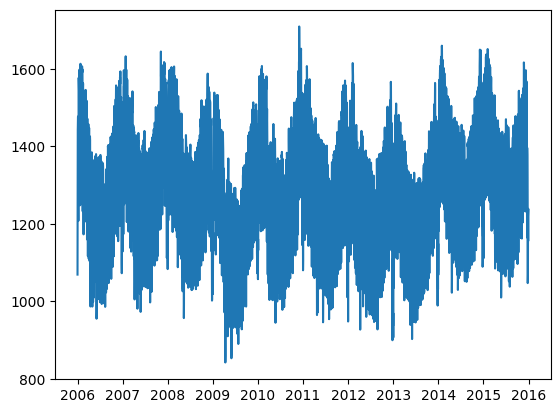

In [24]:
plt.plot(train.consumption)

<Axes: xlabel='date'>

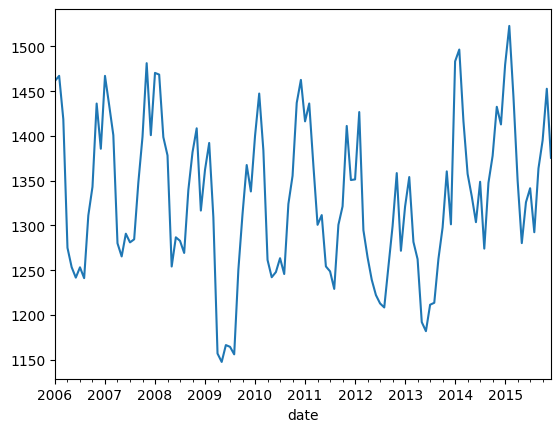

In [34]:
train.resample('M').consumption.mean().plot()

<Axes: xlabel='date'>

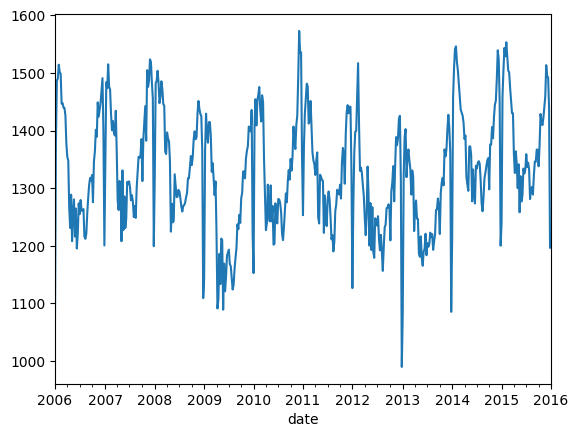

In [36]:
train.resample('W').consumption.mean().plot()

<Axes: xlabel='date'>

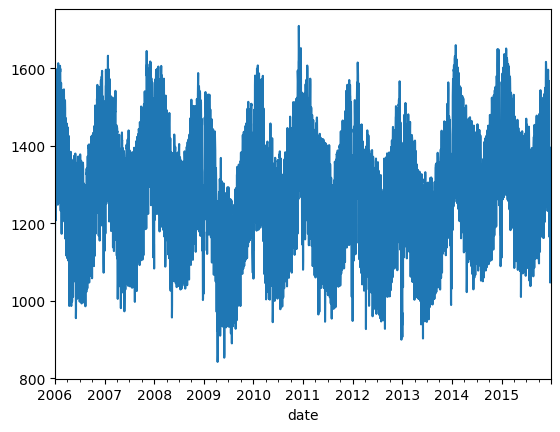

In [37]:
train.resample('D').consumption.mean().plot()

In [38]:
train

,consumption,wind,solar,wind+solar,month,year
date,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,1,2006
2006-01-02,1380.521,0.000,0.000,0.000,1,2006
2006-01-03,1442.533,0.000,0.000,0.000,1,2006
2006-01-04,1457.217,0.000,0.000,0.000,1,2006
2006-01-05,1477.131,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2015-12-27,1068.214,440.394,38.625,479.019,12,2015
2015-12-28,1219.075,206.191,41.696,247.887,12,2015
2015-12-29,1233.660,305.635,32.625,338.260,12,2015


<Axes: xlabel='date'>

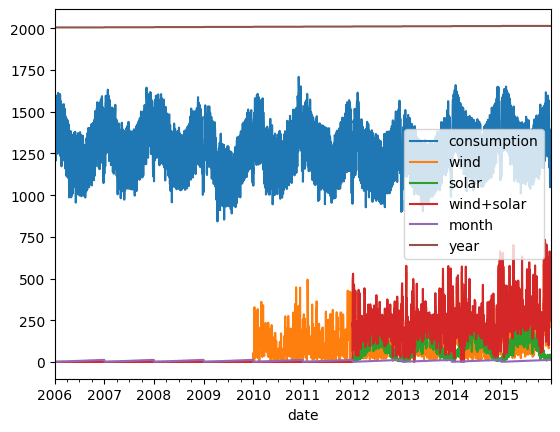

In [39]:
train.plot()

<Axes: xlabel='date'>

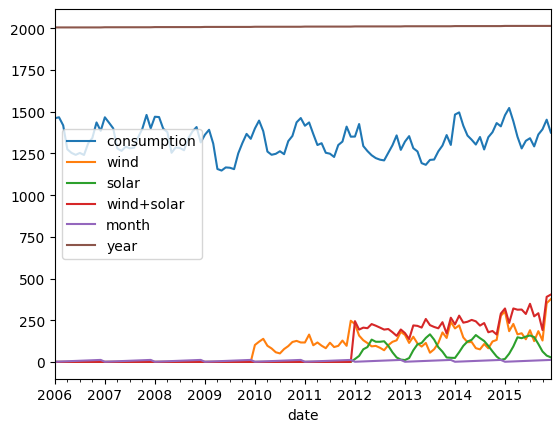

In [41]:
train.resample('M').mean().plot()

<Axes: xlabel='date'>

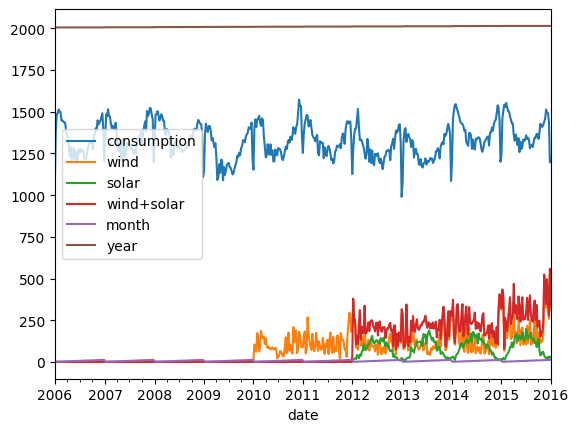

In [42]:
train.resample('W').mean().plot()

<Axes: xlabel='date'>

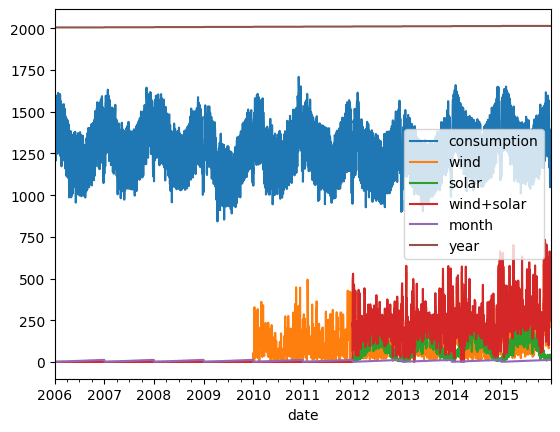

In [43]:
train.resample('D').mean().plot()

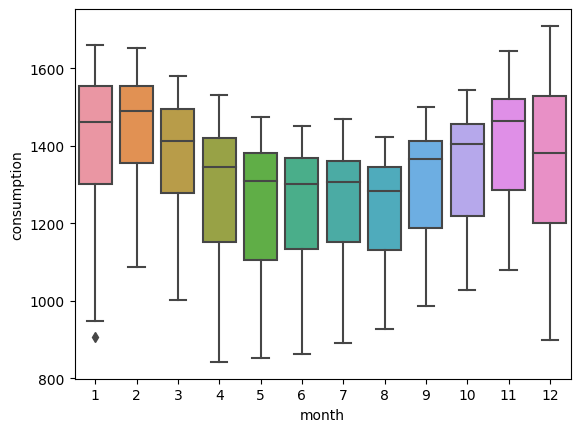

In [51]:
sns.boxplot(data = train.reset_index(), x = 'month', y = 'consumption')
plt.show()

/var/folders/fj/k2vb8khs0gz6fm0_xh02d41c0000gn/T/ipykernel_45398/4195868012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t+1)'] = train.consumption.shift(-1)


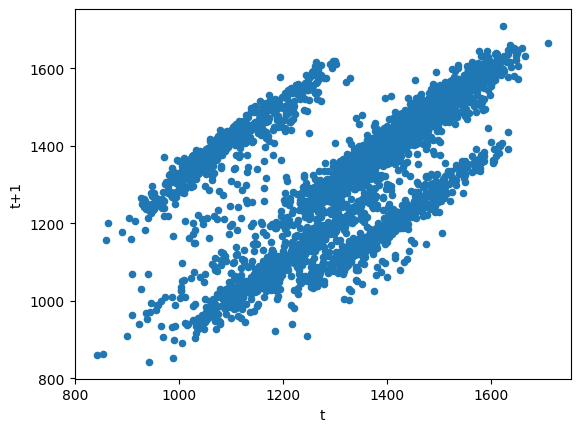

In [53]:
train['y(t+1)'] = train.consumption.shift(-1)
train.plot.scatter(x='consumption',y='y(t+1)').set(xlabel='t',ylabel='t+1')
plt.show()

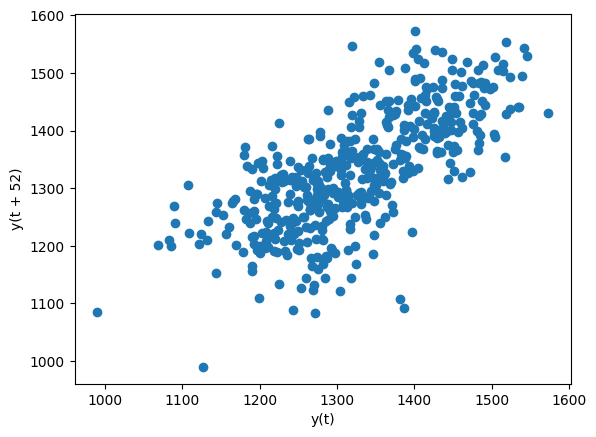

In [55]:
pd.plotting.lag_plot(train.resample('W').consumption.mean(),lag=52)
plt.show()

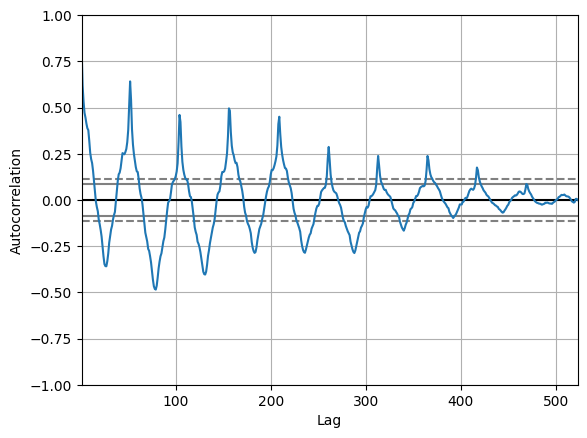

In [57]:
pd.plotting.autocorrelation_plot(train.resample('W').consumption.mean())
plt.show()

In [61]:
y=train.consumption.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)

In [62]:
decomposition = pd.DataFrame({
    'y':result.observed,
    'trend':result.trend,
    'seasonal':result.seasonal,
    'resid':result.resid
})


<Axes: xlabel='date'>

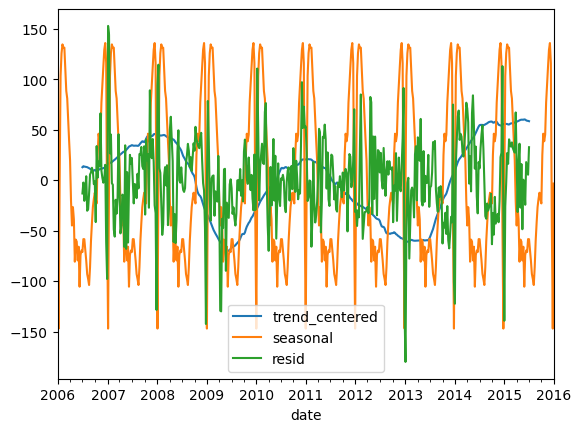

In [63]:
decomposition['trend_centered']=decomposition.trend-decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()


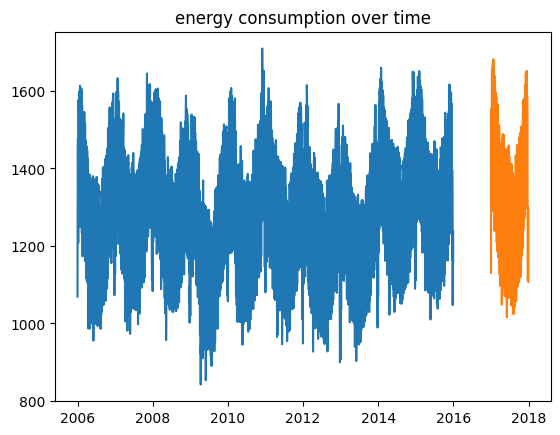

In [17]:
 # time seires plot that show the variation of the target variable over time
plt.plot(train.consumption)
plt.plot(test.consumption)
plt.title('energy consumption over time')
plt.show()


In [13]:
cons = train['consumption'].resample('M').mean()
wind = train['wind'].resample('M').mean()
solar = train['solar'].resample('M').mean()


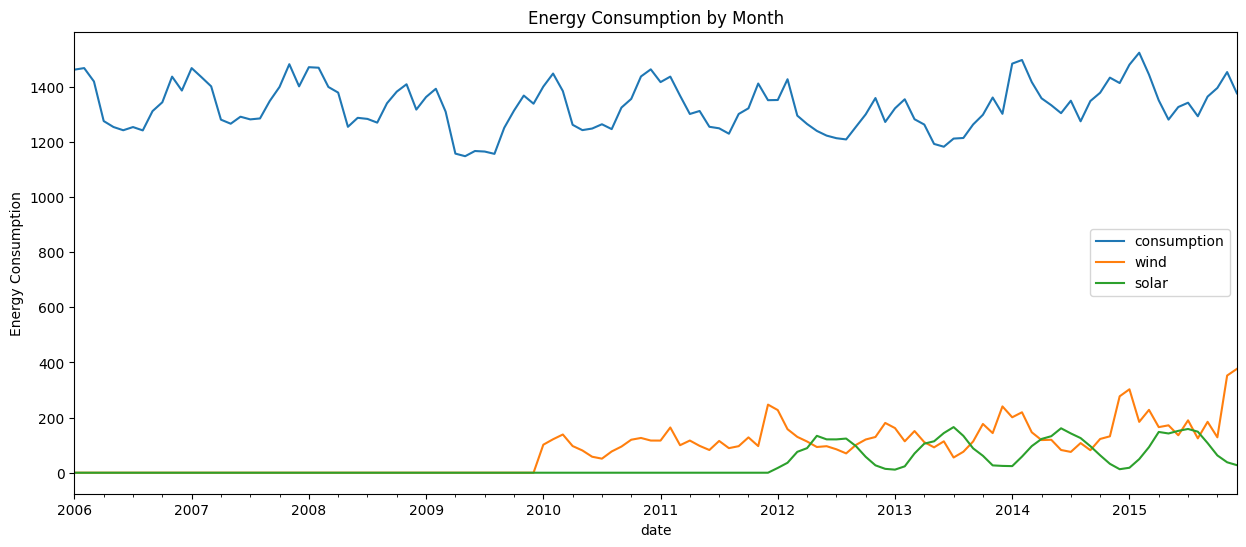

In [14]:
cons.plot(figsize=(15, 6))
wind.plot()
solar.plot()
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Month')
plt.legend()
plt.show()

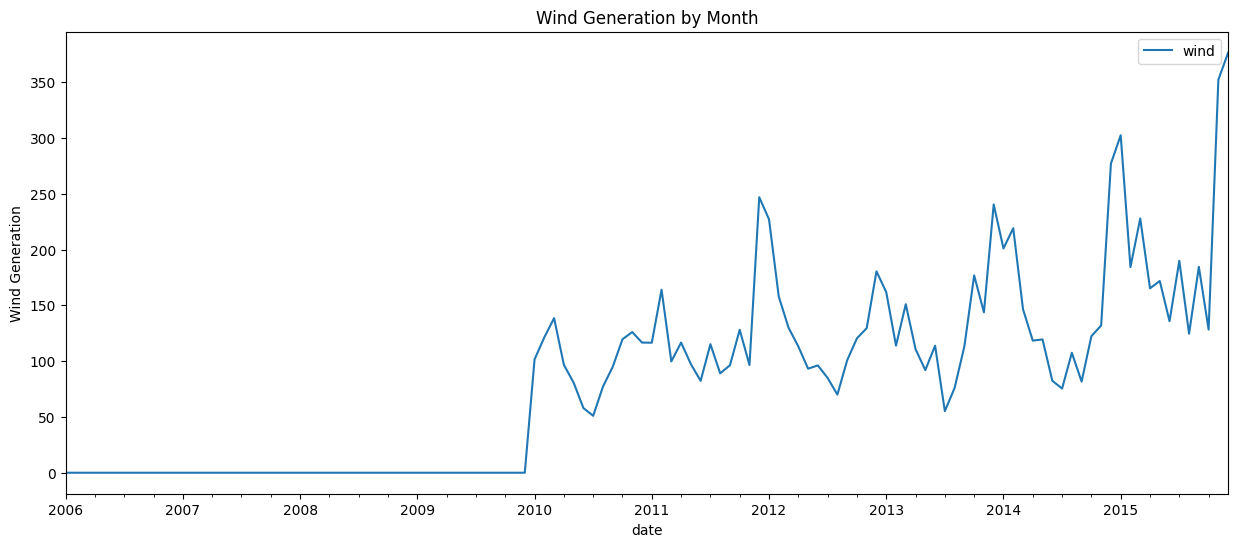

In [15]:
wind.plot(figsize=(15, 6))
plt.ylabel('Wind Generation')
plt.title('Wind Generation by Month')
plt.legend()
plt.show()


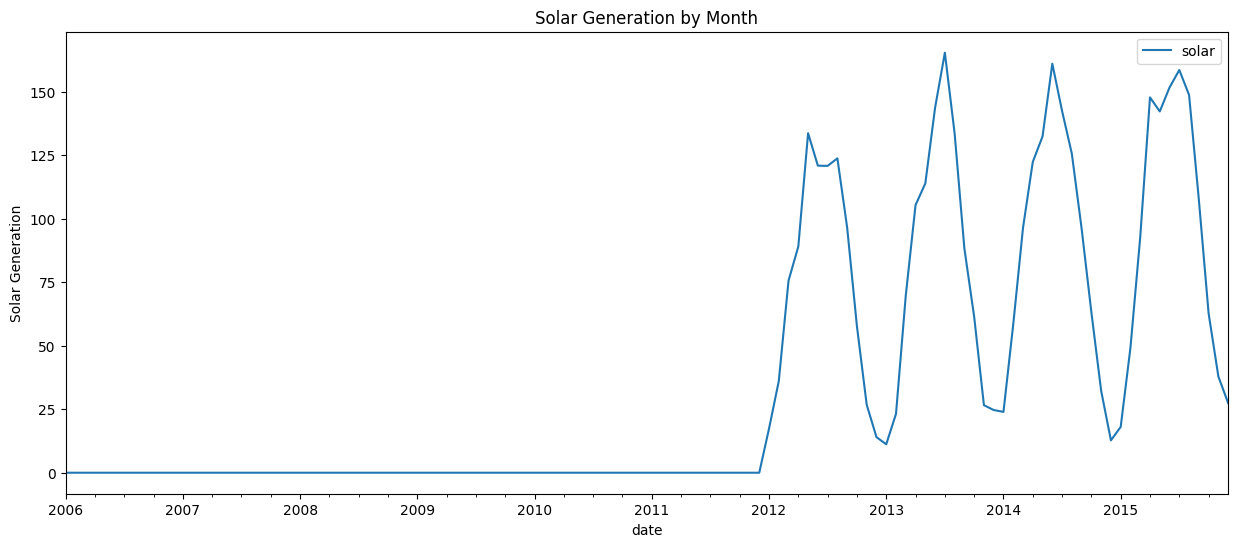

In [16]:
solar.plot(figsize=(15, 6))
plt.ylabel('Solar Generation')
plt.title('Solar Generation by Month')
plt.legend()
plt.show()

# visualization 

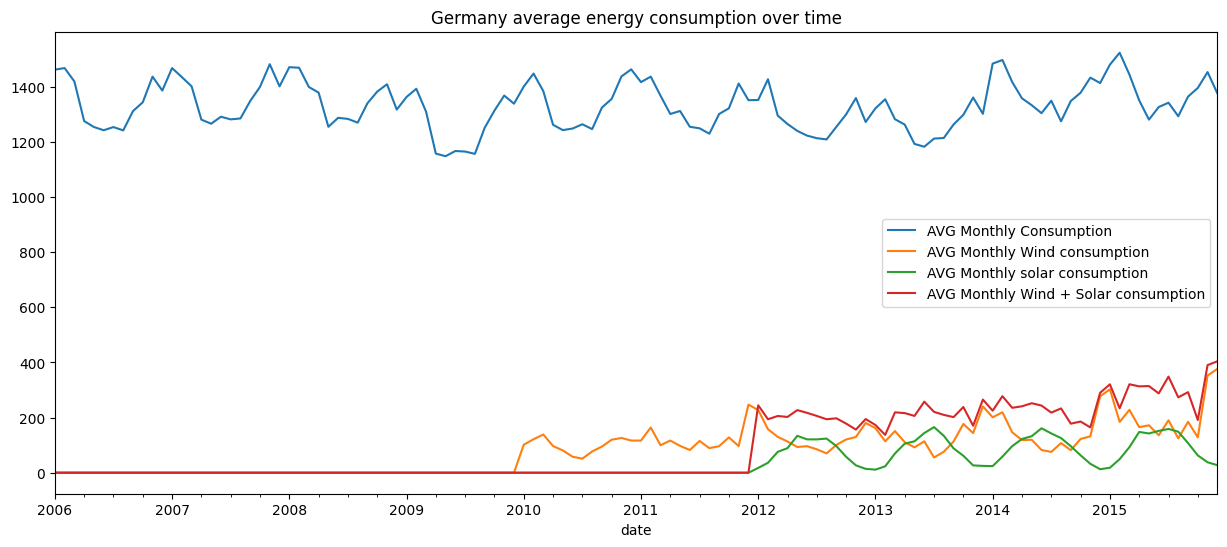

In [29]:
plt.figure(figsize=(15, 6))
train.consumption.resample('M').mean().plot( label='AVG Monthly Consumption')
train.wind.resample('M').mean().plot(label='AVG Monthly Wind consumption')
train.solar.resample('M').mean().plot(label='AVG Monthly solar consumption')
train['wind+solar'].resample('M').mean().plot( label='AVG Monthly Wind + Solar consumption')
plt.title('Germany average energy consumption over time')
plt.legend()
plt.show()


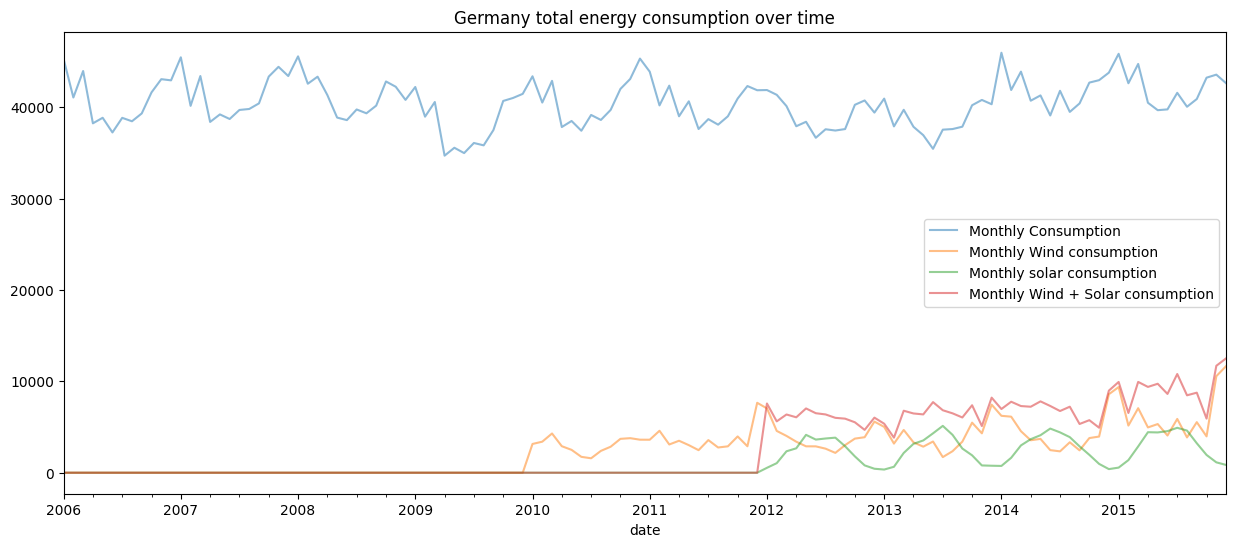

In [30]:
plt.figure(figsize=(15, 6))
train.consumption.resample('M').sum().plot(alpha=.5, label='Monthly Consumption')
train.wind.resample('M').sum().plot(alpha=.5, label='Monthly Wind consumption')
train.solar.resample('M').sum().plot(alpha=.5, label='Monthly solar consumption')
train['wind+solar'].resample('M').sum().plot(alpha=.5, label='Monthly Wind + Solar consumption')
plt.title('Germany total energy consumption over time')
plt.legend()
plt.show()